<a href="https://colab.research.google.com/github/berbir12/dermis/blob/main/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
import ipywidgets as widgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.5 MB/s eta 0:00:00


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
data_path = '/content/drive/MyDrive/skint'

In [ ]:
dSKin_Types = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))


In [ ]:
dls = dSKin_Types.dataloaders(data_path)

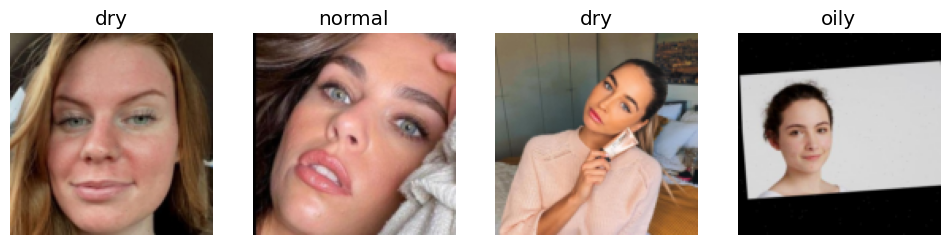

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

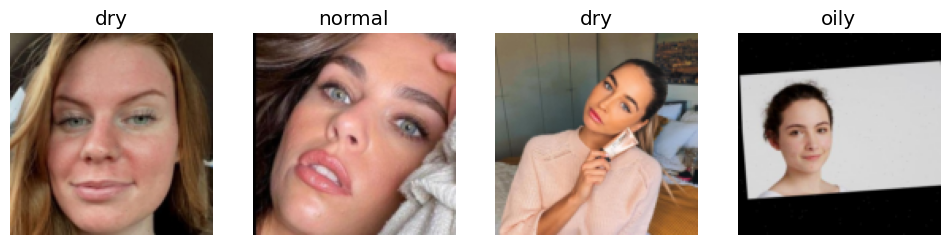

In [ ]:
dSKin_Types = dSKin_Types.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = dSKin_Types.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
dSKin_Types = dSKin_Types.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = dSKin_Types.dataloaders(data_path)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 205MB/s]


Suggested learning rates: minimum=2.1e-04, steep=4.0e-06


epoch,train_loss,valid_loss,error_rate,time
0,1.721073,1.147199,0.494471,13:28
1,1.421864,0.956024,0.417957,02:24
2,1.224078,0.863049,0.382132,02:30
3,1.129817,0.797898,0.350730,02:26
4,1.061548,0.798409,0.346307,02:24


epoch,train_loss,valid_loss,error_rate,time
0,1.047288,0.781036,0.328616,02:37
1,0.995224,0.737154,0.308271,02:38
2,0.970111,0.695310,0.287926,02:37
3,0.886746,0.616915,0.238390,02:37
4,0.755222,0.551917,0.218045,02:32
5,0.653076,0.502646,0.184874,02:37
6,0.537093,0.410744,0.150818,02:31
7,0.446039,0.395209,0.139319,02:32
8,0.376898,0.351784,0.117205,02:33
9,0.324127,0.321198,0.103052,02:34


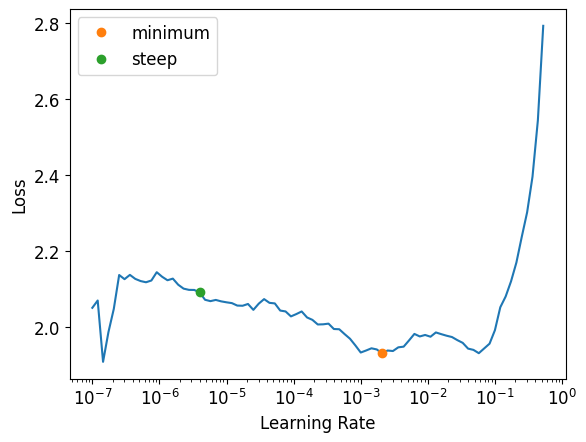

In [ ]:
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.freeze()

lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))
print(f"Suggested learning rates: minimum={lr_min:.1e}, steep={lr_steep:.1e}")

learn.fit_one_cycle(10, lr_min)
learn.unfreeze()
learn.fit_one_cycle(25, slice(lr_min/10, lr_min))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export()


In [ ]:
data_path = Path()
data_path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(data_path/'export.pkl')


In [ ]:
learn_inf.predict('drive/MyDrive/skin2/acne/berjerawat (1).jpg')

In [ ]:
learn_inf.dls.vocab